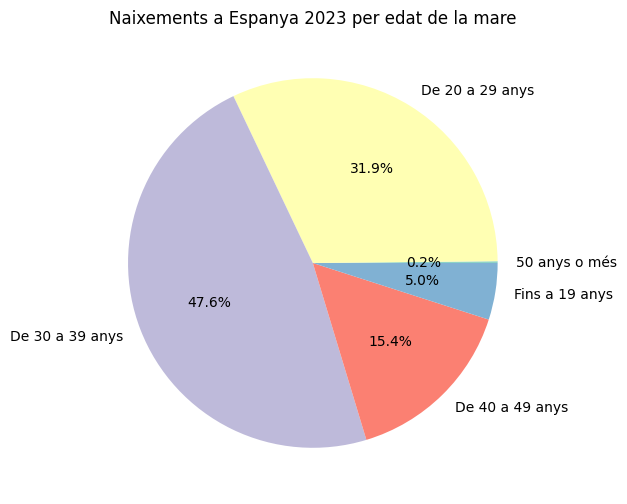

In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from dash import Dash, dcc, html, Input, Output


data = pd.read_csv('mujeres.csv', sep='\t')
# edadeas = data['Edad de la madre'].unique()
# print(edadeas)
# Crear variables separadas para cada rango de edad

def categorizar_edad(edad):
    if edad in ['Menos de 15 años', '15 años', '16 años', '17 años', '18 años', '19 años']:
        return 'Fins a 19 anys'
    elif edad in ['20 años', '21 años', '22 años', '23 años', '24 años', '25 años', 
                 '26 años', '27 años', '28 años', '29 años']:
        return 'De 20 a 29 anys'
    elif edad in ['30 años', '31 años', '32 años', '33 años', '34 años', '35 años', 
                 '36 años', '37 años', '38 años', '39 años']:
        return 'De 30 a 39 anys'
    elif edad in ['40 años', '41 años', '42 años', '43 años', '44 años', '45 años', 
                 '46 años', '47 años', '48 años', '49 años']:
        return 'De 40 a 49 anys'
    elif edad == '50 y más años':
        return '50 anys o més'

datos_2023 = data[(data['Periodo'] == 2023) & (data['Edad de la madre'].notna()) & (data['Nacional y Comunidades autónomas'] == 'Total Nacional') & data['Edad de la madre'] != 'Todas las edades'].copy()

datos_2023['Grupo de edades'] = datos_2023['Edad de la madre'].apply(categorizar_edad)

datos_filtrados = datos_2023.groupby('Grupo de edades')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
colores = sns.color_palette('Set3', len(datos_filtrados))
plt.title('Naixements a Espanya 2023 per edat de la mare')
plt.pie(datos_filtrados['Total'], labels=datos_filtrados['Grupo de edades'], autopct='%1.1f%%', colors=colores)
plt.show()

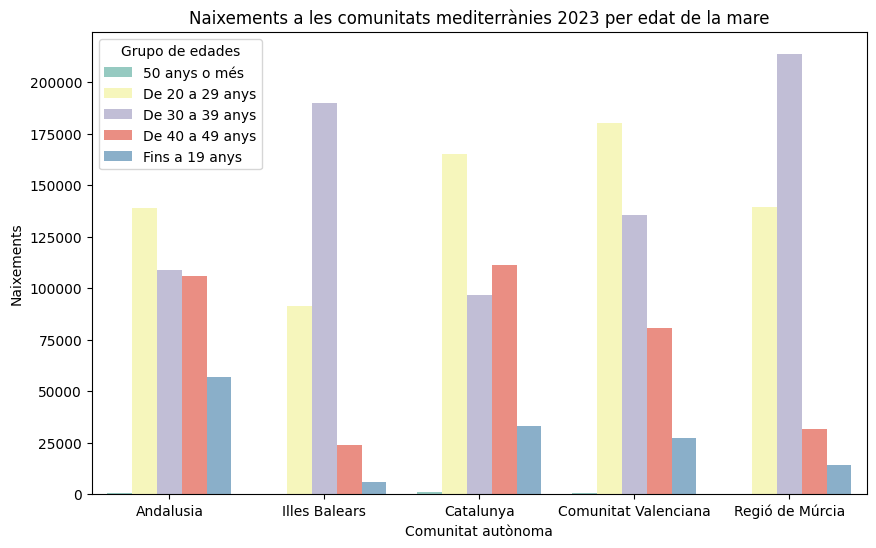

In [19]:
#provicnias = datos_2023['Nacional y Comunidades autónomas'].unique()
#print(provicnias)

comunidades_mediterraneas = ['04 Balears, Illes','09 Cataluña','10 Comunitat Valenciana','14 Murcia, Región de','01 Andalucía']

mediterraneo = data[data['Nacional y Comunidades autónomas'].isin(comunidades_mediterraneas)].copy()

mediterraneo['Grupo de edades'] = mediterraneo['Edad de la madre'].apply(categorizar_edad)

mediterraneo = mediterraneo.groupby(['Nacional y Comunidades autónomas','Grupo de edades'])['Total'].sum().reset_index()

nombre_comunidades = {'04 Balears, Illes':'Illes Balears','09 Cataluña':'Catalunya','10 Comunitat Valenciana':'Comunitat Valenciana','14 Murcia, Región de':'Regió de Múrcia','01 Andalucía':'Andalusia'}

mediterraneo['Comunidad'] = mediterraneo['Nacional y Comunidades autónomas'].map(nombre_comunidades)

plt.figure(figsize=(10, 6))
plt.title('Naixements a les comunitats mediterrànies 2023 per edat de la mare')
plt.xlabel('Comunitat autònoma') 
plt.ylabel('Naixements')
sns.barplot(data=mediterraneo, x='Comunidad', y='Total', hue='Grupo de edades', palette='Set3', errorbar=None)
plt.show()

In [13]:
datos2009_2023 = data[(data['Periodo'] >= 2009) & (data['Periodo'] <= 2023) & (data['Edad de la madre'].notna())].copy()
#valor=data['Orden del nacido vivo'].unique()
#print(valor)

def categorizar_nacimienot(posicion):
    if posicion == 'Primero':
        return 'Primero'
    elif posicion == 'Segundo':
        return 'Segundo'
    elif posicion in ['Tercero', 'Cuarto', 'Quinto', 'Sexto', 'Séptimo', 'Octavo', 'Noveno', 'Décimo y más']:
        return 'Tercero o posterior'
    
datos2009_2023['Orden nacido'] = datos2009_2023['Orden del nacido vivo'].apply(categorizar_nacimienot)
datos_filtrados = datos2009_2023.groupby(['Periodo','Orden nacido'])['Total'].sum().reset_index()

px.bar(datos_filtrados, x='Periodo', y='Total', color='Orden nacido',barmode = "group",title='Naixements a Espanya de 2009 fins 2023 per ordre del fill')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Orden nacido=Primero<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'Primero',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Primero',
              'offsetgroup': 'Primero',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([123563.469, 121875.171, 120914.771, 121645.833, 121621.324, 118895.344,
                          116007.694, 114214.414, 112813.872, 108782.014, 106769.307, 103838.192,
                          102992.343, 104414.767, 102578.201]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Orden nacido=Segundo<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'Segundo',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Segundo',
              'offsetgroup': 'Segundo',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([96544.665, 97709.085, 95558.885, 95551.993, 90818.985, 89996.336,
                          89935.044, 92768.861, 89727.522, 87263.436, 86104.995, 83184.959,
                          83635.513, 83573.414, 82767.101]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Orden nacido=Tercero o posterior<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'Tercero o posterior',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'Tercero o posterior',
              'offsetgroup': 'Tercero o posterior',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([84207.216, 85064.039, 78408.053, 77306.787, 72174.356, 73970.267,
                          74934.946, 76580.853, 77530.552, 78745.085, 82214.246, 76677.511,
                          79042.079, 78003.883, 74434.566]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'Orden nacido'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Naixements a Espanya de 2009 fins 2023 per ordre del fill'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Periodo'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Total'}}}
})

<Axes: xlabel='Periodo', ylabel='Total'>

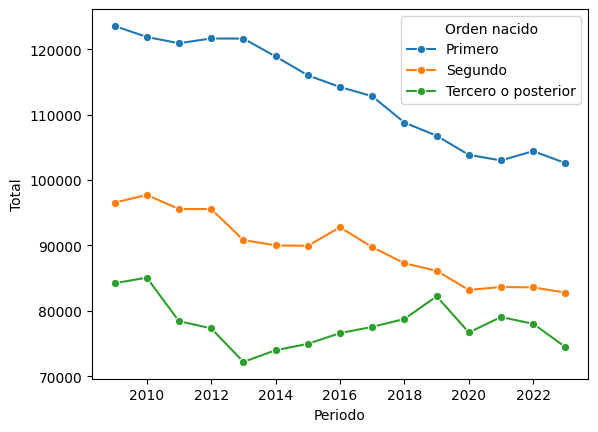

In [14]:
sns.lineplot(datos_filtrados,x='Periodo',y='Total',hue='Orden nacido', marker='o')

In [15]:
baleares = data[(data['Nacional y Comunidades autónomas'] == '04 Balears, Illes') & (data['Edad de la madre'].notna()) & (data['Periodo'] >= 2009) & (data['Periodo'] <= 2023)].copy()
baleares['Grupo de edades'] = baleares['Edad de la madre'].apply(categorizar_edad)
baleares_filtrados = baleares.groupby(['Periodo','Grupo de edades'])['Total'].sum().reset_index()

px.line(baleares_filtrados, x='Periodo', y='Total', color='Grupo de edades',title='Naixements a les Illes Balears (2009-2023) per grup d\'edat de la mare', markers=True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Grupo de edades=50 anys o més<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': '50 anys o més',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': '50 anys o més',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([10.,  4.,  6.,  2.,  0.,  8.,  0.,  6.,  8., 10., 14.,  6., 16.,  8.,
                          18.]),
              'yaxis': 'y'},
             {'hovertemplate': 'Grupo de edades=De 20 a 29 anys<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'De 20 a 29 anys',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'De 20 a 29 anys',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([8576., 8060., 7016., 6646., 6660., 6160., 5922., 5944., 5680., 5662.,
                          5656., 5364., 4802., 4594., 4716.]),
              'yaxis': 'y'},
             {'hovertemplate': 'Grupo de edades=De 30 a 39 anys<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'De 30 a 39 anys',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'De 30 a 39 anys',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([13792., 14172., 13832., 13514., 12590., 13252., 13404., 13240., 12664.,
                          12670., 11572., 11488., 11980., 11318., 10630.]),
              'yaxis': 'y'},
             {'hovertemplate': 'Grupo de edades=De 40 a 49 anys<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'De 40 a 49 anys',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'De 40 a 49 anys',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([1060., 1118., 1206., 1390., 1398., 1552., 1558., 1640., 1828., 1920.,
                          1792., 1756., 1994., 1996., 1846.]),
              'yaxis': 'y'},
             {'hovertemplate': 'Grupo de edades=Fins a 19 anys<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'Fins a 19 anys',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'Fins a 19 anys',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                          2021, 2022, 2023]),
              'xaxis': 'x',
              'y': array([650., 580., 470., 452., 416., 374., 310., 402., 396., 308., 328., 296.,
                          248., 242., 266.]),
              'yaxis': '

Text(0, 0.5, 'Nombre de naixements')

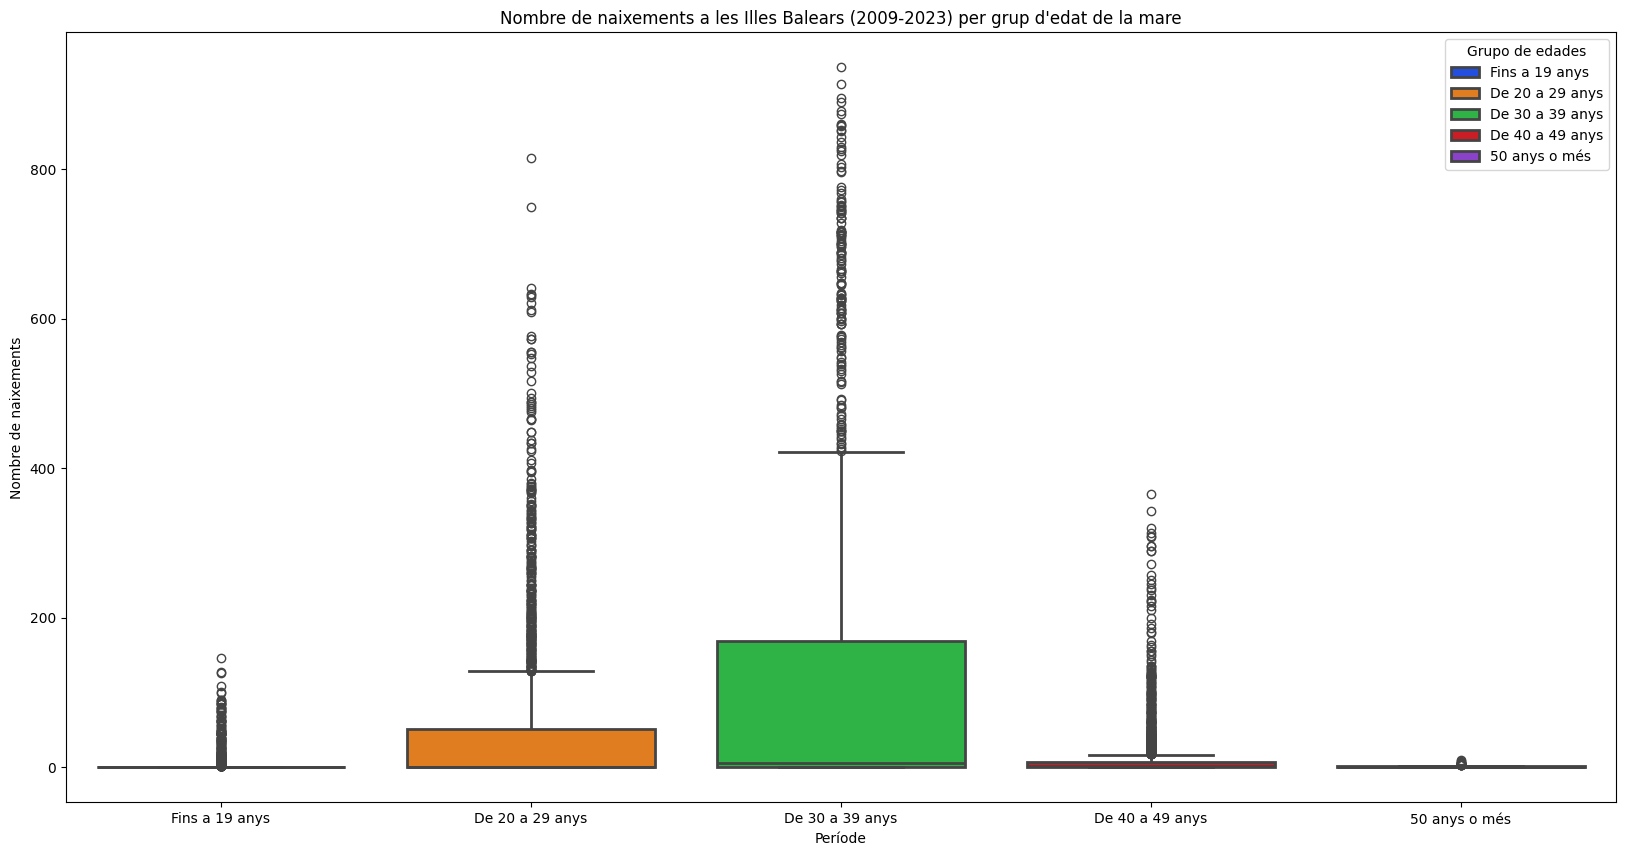

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=baleares, x='Grupo de edades', y='Total', hue='Grupo de edades', palette='bright', linewidth=2 )
plt.title('Nombre de naixements a les Illes Balears (2009-2023) per grup d\'edat de la mare')
plt.xlabel('Període')
plt.ylabel('Nombre de naixements')

In [7]:
mediterraneo = data[(data['Edad de la madre'].notna()) & (data['Periodo'] >= 2009) & (data['Periodo'] <= 2023)].copy()
mediterraneo = mediterraneo[mediterraneo['Nacional y Comunidades autónomas'].isin(comunidades_mediterraneas)]
mediterraneo = mediterraneo.groupby(['Periodo','Nacional y Comunidades autónomas'])['Total'].sum().reset_index()
px.box(mediterraneo, x="Nacional y Comunidades autónomas", y ="Total", color="Nacional y Comunidades autónomas",title='Naixements a les comunitats mediterrànies (2009-2023)')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Nacional y Comunidades autónomas=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': '01 Andalucía',
              'marker': {'color': '#636efa'},
              'name': '01 Andalucía',
              'notched': False,
              'offsetgroup': '01 Andalucía',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['01 Andalucía', '01 Andalucía', '01 Andalucía', '01 Andalucía',
                          '01 Andalucía', '01 Andalucía', '01 Andalucía', '01 Andalucía',
                          '01 Andalucía', '01 Andalucía', '01 Andalucía', '01 Andalucía',
                          '01 Andalucía', '01 Andalucía', '01 Andalucía'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([25870.946, 26132.015, 24820.721, 25583.237, 25386.794, 26784.298,
                          26493.335, 28783.557, 29450.555, 29782.588, 31079.755, 30279.041,
                          31593.238, 30849.24 , 31278.524]),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Nacional y Comunidades autónomas=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': '04 Balears, Illes',
              'marker': {'color': '#EF553B'},
              'name': '04 Balears, Illes',
              'notched': False,
              'offsetgroup': '04 Balears, Illes',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['04 Balears, Illes', '04 Balears, Illes', '04 Balears, Illes',
                          '04 Balears, Illes', '04 Balears, Illes', '04 Balears, Illes',
                          '04 Balears, Illes', '04 Balears, Illes', '04 Balears, Illes',
                          '04 Balears, Illes', '04 Balears, Illes', '04 Balears, Illes',
                          '04 Balears, Illes', '04 Balears, Illes', '04 Balears, Illes'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([24540.659, 24381.51 , 22911.171, 22345.684, 21402.746, 21683.03 ,
                          21604.804, 21607.877, 20955.217, 20959.201, 20745.996, 19315.523,
                          20401.696, 19490.842, 18768.2  ]),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Nacional y Comunidades autónomas=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': '09 Cataluña',
              'marker': {'color': '#00cc96'},
              'name': '09 Cataluña',
              'notched': False,
              'offsetgroup': '09 Cataluña',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['09 Cataluña', '09 Cataluña', '09 Cataluña', '09 Cataluña',
                          '09 Cataluña', '09 Cataluña', '09 Cataluña', '09 Cataluña',
                          '09 Cataluña', '09 Cataluña', '09 Cataluña', '09 Cataluña',
                          '09 Cataluña', '09 Cataluña', '09 Cataluña'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([24696.436, 25664.12 , 23872.417, 26277.758, 27339.284, 27405.21 ,
                          27654.4  , 28534.345, 29531.918, 28619.87 , 29540.868, 29162.898,
                          30083.653, 31966.603, 30180.702]),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Nacional y Comunidades autónomas=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': '10 Comunitat Valenciana',
              'marker': {'color': '#ab63fa'},
              'name': '10 Comunitat Valenciana',
              'notched': False,
              'offsetgroup': '10 Comunitat Valenciana',
              'orien

In [8]:
print(data['Nacional y Comunidades autónomas'].unique())

['Total Nacional' '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' '18 Ceuta' '19 Melilla' 'No residente']


In [17]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('Nombre de naixements per a grup d\'edat de la mare ordenats per ordre del fill'),
    dcc.Dropdown(id='dropdown',
                options=[{'label': 'Andalucía', 'value':'01 Andalucía'},{ 'label': 'Aragón', 'value':'02 Aragón'},{'label':'Asturias','value':'03 Asturias, Principado de'},{'label':'Islas Baleares','value':'04 Balears, Illes'},{'label':'Canarias','value':'05 Canarias'},{'label':'Cantabria','value':'06 Cantabria'},{'label':'Castilla y León','value':'07 Castilla y León'},{'label':'Castilla - La Mancha','value':'08 Castilla - La Mancha'},{'label':'Cataluña', 'value':'09 Cataluña'},{'label':'Comunidad Valenciana', 'value':'10 Comunitat Valenciana'},{'label':'Extremadura', 'value':'11 Extremadura'}, {'label':'Galicia', 'value':'12 Galicia'}, {'label':'Madrid', 'value':'13 Madrid, Comunidad de'}, {'label':'Región de Murcia', 'value':'14 Murcia, Región de'}, {'label':'Navarra', 'value':'15 Navarra, Comunidad Foral de'}, {'label':'País Vasco', 'value':'16 País Vasco'},{'label':'La Rioja', 'value':'17 Rioja, La'}, {'label':'Ceuta', 'value':'18 Ceuta'}, {'label':'Melilla', 'value':'19 Melilla'}],
                value = '01 Andalucía'),
    dcc.Graph(id='bar-chart-x-graph')
])

@app.callback(
    Output('bar-chart-x-graph', 'figure'),
    Input('dropdown', 'value')
)

 
def update_bar_chart(selected_value):
   filtro = data[(data['Nacional y Comunidades autónomas'] == selected_value) & (data['Edad de la madre'].notna())].copy()
   filtro['Grupo de edades'] = filtro['Edad de la madre'].apply(categorizar_edad)
   filtro['Orden nacido'] = filtro['Orden del nacido vivo'].apply(categorizar_nacimienot)
   filtro = filtro.groupby(['Grupo de edades', 'Orden nacido'])['Total'].sum().reset_index() 
   fig = px.bar(filtro, x='Grupo de edades', y='Total', color='Orden nacido', barmode='group')
   return fig

if __name__ == '__main__':
    app.run_server(debug=True)